# Challenge 1: Inspecting Nearby Targets to Reveal Instrumental Noise

## Goal

The Sector 1 light curve of the first confirmed TESS planet system, Pi Mensae, contains a combination of true and systematic signals. Can you separate them by inspecting nearby targets?

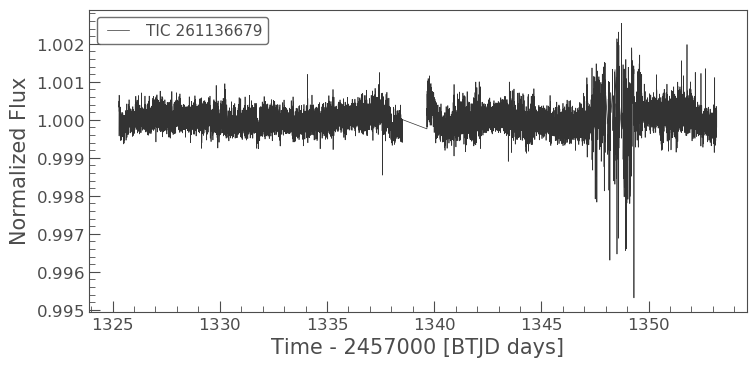

In [82]:
# Plot the pipeline light curve of Pi Mensae
import lightkurve as lk
lcf = lk.search_lightcurvefile("Pi Mensae", sector=1).download()
lcf.PDCSAP_FLUX.plot();

## Hint

The `search_lightcurvefile()` function accepts a `radius` argument which allows multiple nearby sources to be returned.

## Solution

In [23]:
import lightkurve as lk
from astropy import units as u
import matplotlib.pyplot as plt

TESS observed 4 targets in 2-minute cadence within 20 arcminutes of Pi Mensae:

In [84]:
search = lk.search_lightcurvefile("Pi Mensae", sector=1, radius=1200*u.arcsec)
search

SearchResult containing 5 data products.

   obsID    target_name                     productFilename                     description       distance     
----------- ----------- ------------------------------------------------------- ------------ ------------------
17000008389   261136679 tess2018206045859-s0001-0000000261136679-0120-s_lc.fits Light curves                0.0
17000008386   261136641 tess2018206045859-s0001-0000000261136641-0120-s_lc.fits Light curves 423.89554545891264
17000001634   261139167 tess2018206045859-s0001-0000000261139167-0120-s_lc.fits Light curves  779.4788652486485
17000008387   261136765 tess2018206045859-s0001-0000000261136765-0120-s_lc.fits Light curves  825.2418172401073
17000010640   392012671 tess2018206045859-s0001-0000000392012671-0120-s_lc.fits Light curves 1114.1480537576522

Let's download and plot them all!

In [66]:
files = search.download_all()

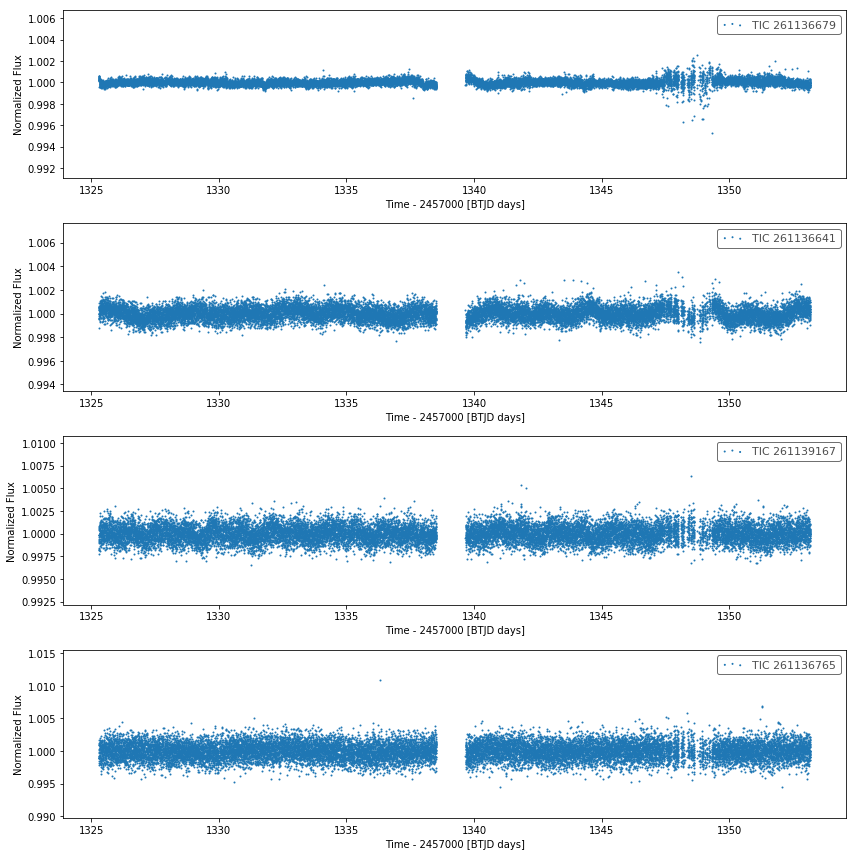

In [90]:
fig = plt.figure(figsize=(12, 12))
for idx in range(len(files)):
    ax = plt.subplot(len(files), 1, idx+1)
    files[idx].PDCSAP_FLUX.scatter(ax=ax)
plt.tight_layout()

The plot reveals that the gap near BTJD=1339 and the noise near BTJD=1349 are present in all nearby light curves.  They must therefore be instrumental systematics!